In [ ]:
!pip install fbprophet

# 1. Import Dependencies

In [34]:
import pandas as pd # Import pandas
from fbprophet import Prophet # Prophet modelling library

# 2. Load Data

In [35]:
df = pd.read_csv('dataset.csv')

In [36]:
df.head()

,Date,Store/Product,Value
0,20180101,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [37]:
df.dtypes

Date               int64
Store/Product     object
Value            float64
dtype: object

# 3. Apply Data Preprocessing

In [38]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [39]:
frame = df[df['Store/Product'] == 'LOS_ANGELES-TESLA_MODEL_X'].copy()

In [40]:
frame.drop('Store/Product', axis=1, inplace=True)

In [41]:
frame.columns = ['ds', 'y']

In [42]:
frame.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


# 4. Create Time Series Model

In [43]:
m = Prophet(interval_width=0.95) 

In [44]:
training_run = m.fit(frame)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 5. Evaluate Model

In [45]:
future = m.make_future_dataframe(periods=400, freq='D')

In [46]:
forecast = m.predict(future)

In [47]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3510.158165,931.345687,3963.307882,3510.158165,3510.158165,-1111.274728,-1111.274728,-1111.274728,16.630785,16.630785,16.630785,-1127.905513,-1127.905513,-1127.905513,0.0,0.0,0.0,2398.883437
1,2018-01-02,3510.918895,839.921205,4054.365480,3510.918895,3510.918895,-1121.474840,-1121.474840,-1121.474840,-11.278673,-11.278673,-11.278673,-1110.196167,-1110.196167,-1110.196167,0.0,0.0,0.0,2389.444055
2,2018-01-03,3511.679625,851.592397,4084.451305,3511.679625,3511.679625,-1095.700053,-1095.700053,-1095.700053,-4.415302,-4.415302,-4.415302,-1091.284751,-1091.284751,-1091.284751,0.0,0.0,0.0,2415.979572
3,2018-01-04,3512.440355,869.090164,3989.532154,3512.440355,3512.440355,-1048.748598,-1048.748598,-1048.748598,22.499269,22.499269,22.499269,-1071.247867,-1071.247867,-1071.247867,0.0,0.0,0.0,2463.691757
4,2018-01-05,3513.201085,801.384960,3966.173621,3513.201085,3513.201085,-1084.784956,-1084.784956,-1084.784956,-34.569798,-34.569798,-34.569798,-1050.215158,-1050.215158,-1050.215158,0.0,0.0,0.0,2428.416129


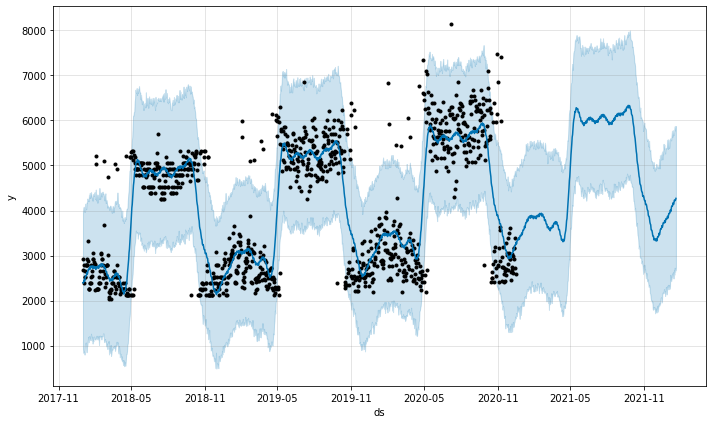

In [48]:
plot1 = m.plot(forecast)

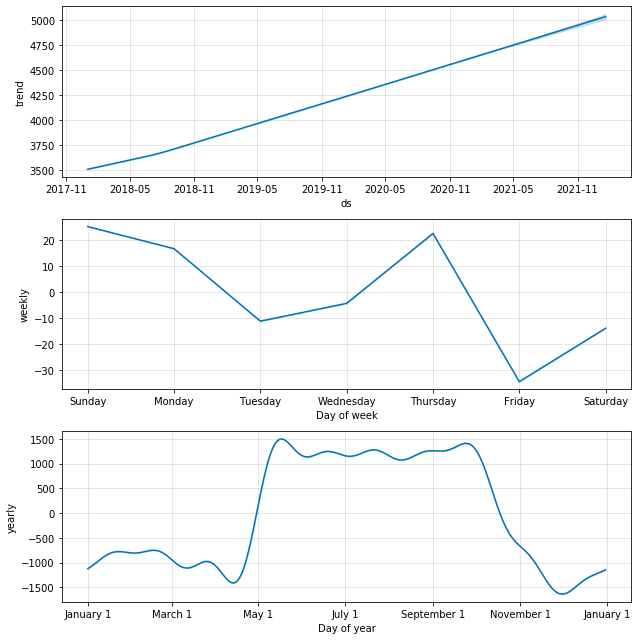

In [49]:
plot2 = m.plot_components(forecast)

# BONUS ROUND - Scaling Up

In [50]:
lines = df['Store/Product'].unique()

In [51]:
df[df['Store/Product']=='SAN_FRANCISCO-TESLA_MODEL_S']

,Date,Store/Product,Value
2160,2018-01-01,SAN_FRANCISCO-TESLA_MODEL_S,2679.400000
2161,2018-01-02,SAN_FRANCISCO-TESLA_MODEL_S,2466.777900
2162,2018-01-03,SAN_FRANCISCO-TESLA_MODEL_S,2562.700000
2163,2018-01-04,SAN_FRANCISCO-TESLA_MODEL_S,2203.600000
2164,2018-01-05,SAN_FRANCISCO-TESLA_MODEL_S,2441.000000
...,...,...,...
3235,2020-12-12,SAN_FRANCISCO-TESLA_MODEL_S,2899.835050
3236,2020-12-13,SAN_FRANCISCO-TESLA_MODEL_S,2896.835050
3237,2020-12-14,SAN_FRANCISCO-TESLA_MODEL_S,3094.019060
3238,2020-12-15,SAN_FRANCISCO-TESLA_MODEL_S,2492.132196


In [52]:
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    print(frame.tail())

           Date              Store/Product        Value
1075 2020-12-12  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1076 2020-12-13  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1077 2020-12-14  LOS_ANGELES-TESLA_MODEL_X  3383.354511
1078 2020-12-15  LOS_ANGELES-TESLA_MODEL_X  2714.591329
1079 2020-12-16  LOS_ANGELES-TESLA_MODEL_X  2585.035107
           Date              Store/Product        Value
2155 2020-12-12  LOS_ANGELES-TESLA_MODEL_S  3501.353950
2156 2020-12-13  LOS_ANGELES-TESLA_MODEL_S  3505.353950
2157 2020-12-14  LOS_ANGELES-TESLA_MODEL_S  3751.689962
2158 2020-12-15  LOS_ANGELES-TESLA_MODEL_S  3008.050462
2159 2020-12-16  LOS_ANGELES-TESLA_MODEL_S  2866.538618
           Date                Store/Product        Value
3235 2020-12-12  SAN_FRANCISCO-TESLA_MODEL_S  2899.835050
3236 2020-12-13  SAN_FRANCISCO-TESLA_MODEL_S  2896.835050
3237 2020-12-14  SAN_FRANCISCO-TESLA_MODEL_S  3094.019060
3238 2020-12-15  SAN_FRANCISCO-TESLA_MODEL_S  2492.132196
3239 2020-12-16  SAN_FRANCISCO-TESLA_M

In [53]:
lines

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S',
       'SAN_FRANCISCO-TESLA_MODEL_S'], dtype=object)

In [54]:
fit_models = {}
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    frame.drop('Store/Product', axis=1, inplace=True)
    frame.columns = ['ds', 'y']
    
    m = Prophet(interval_width=0.95)
    model = m.fit(frame)
    
    fit_models[stock_line] = m 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
fit_models

{'LOS_ANGELES-TESLA_MODEL_X': <fbprophet.forecaster.Prophet at 0x7fa2594cb990>,
 'LOS_ANGELES-TESLA_MODEL_S': <fbprophet.forecaster.Prophet at 0x7fa23f32b8d0>,
 'SAN_FRANCISCO-TESLA_MODEL_S': <fbprophet.forecaster.Prophet at 0x7fa25673ff90>}

In [56]:
forward = fit_models['LOS_ANGELES-TESLA_MODEL_S'].make_future_dataframe(200)
forecast = fit_models['LOS_ANGELES-TESLA_MODEL_S'].predict(forward)

In [57]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3886.556538,903.901192,4431.005813,3886.556538,3886.556538,-1220.215651,-1220.215651,-1220.215651,18.340344,18.340344,18.340344,-1238.555994,-1238.555994,-1238.555994,0.0,0.0,0.0,2666.340888
1,2018-01-02,3887.379428,840.378473,4458.122942,3887.379428,3887.379428,-1231.407591,-1231.407591,-1231.407591,-12.202609,-12.202609,-12.202609,-1219.204982,-1219.204982,-1219.204982,0.0,0.0,0.0,2655.971837
2,2018-01-03,3888.202318,965.888873,4451.669289,3888.202318,3888.202318,-1203.251161,-1203.251161,-1203.251161,-4.697234,-4.697234,-4.697234,-1198.553927,-1198.553927,-1198.553927,0.0,0.0,0.0,2684.951157
3,2018-01-04,3889.025208,1108.733886,4424.191776,3889.025208,3889.025208,-1152.039226,-1152.039226,-1152.039226,24.645085,24.645085,24.645085,-1176.684311,-1176.684311,-1176.684311,0.0,0.0,0.0,2736.985982
4,2018-01-05,3889.848098,916.375882,4328.404074,3889.848098,3889.848098,-1192.074394,-1192.074394,-1192.074394,-38.338740,-38.338740,-38.338740,-1153.735654,-1153.735654,-1153.735654,0.0,0.0,0.0,2697.773704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2021-06-30,5319.847095,4798.747766,8381.809125,5310.274748,5330.307597,1273.387104,1273.387104,1273.387104,-4.697234,-4.697234,-4.697234,1278.084338,1278.084338,1278.084338,0.0,0.0,0.0,6593.234199
1276,2021-07-01,5321.034963,4846.416943,8412.035972,5311.432760,5331.561819,1295.228328,1295.228328,1295.228328,24.645085,24.645085,24.645085,1270.583243,1270.583243,1270.583243,0.0,0.0,0.0,6616.263291
1277,2021-07-02,5322.222831,4775.104406,8398.766126,5312.588828,5332.816099,1226.559073,1226.559073,1226.559073,-38.338740,-38.338740,-38.338740,1264.897813,1264.897813,1264.897813,0.0,0.0,0.0,6548.781904
1278,2021-07-03,5323.410699,4909.032215,8330.802133,5313.741755,5334.074331,1246.200433,1246.200433,1246.200433,-15.074302,-15.074302,-15.074302,1261.274735,1261.274735,1261.274735,0.0,0.0,0.0,6569.611132
